## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mergeData = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mergeData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_regimen = mergeData.groupby(["Drug Regimen"])
grouped_regimen

#Figure out the mean
mean_regimen = grouped_regimen["Tumor Volume (mm3)"].mean()


#Figure out the median
median_regimen = grouped_regimen["Tumor Volume (mm3)"].median()

#Figure out variance
variance_regimen = grouped_regimen["Tumor Volume (mm3)"].var()

#Figure out standard deviation
std_regimen = grouped_regimen["Tumor Volume (mm3)"].std()

#Figure out SEM
sem_regimen = grouped_regimen["Tumor Volume (mm3)"].sem()


In [4]:
summary_stats_table = pd.DataFrame({
    "Mean": mean_regimen,
    "Median": median_regimen,
    "Variance": variance_regimen,
    "Standard Deviation": std_regimen,
    "SEM": sem_regimen,
})

summary_stats_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

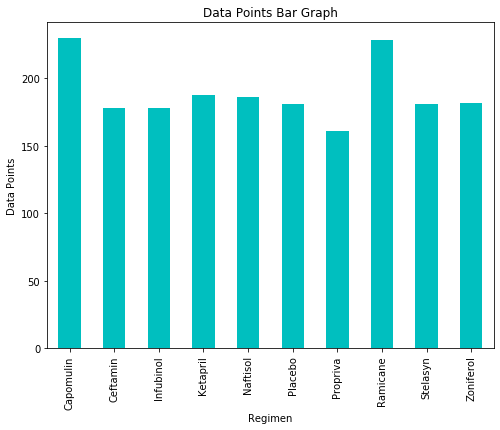

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Organize data to get ready for chart
data_for_bar = mergeData.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Bar plot
data_for_bar.plot(kind="bar", figsize=(8,6), color='c')

#Chart Layout
plt.title("Data Points Bar Graph")
plt.xlabel("Regimen")
plt.ylabel("Data Points")
plt.show()
plt.tight_layout()

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Find out the data points again
data_for_bar

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Data Points')

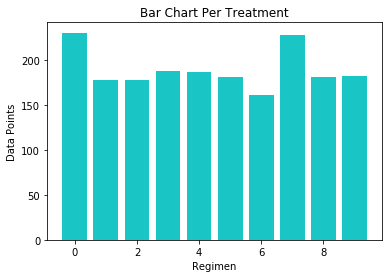

In [7]:
#Make an array with the datapoints
reg = [230,178,178,188,186,181,161,228,181,182]

#Make the X axis
xAxis = np.arange(len(data_for_bar))

#Bar config
plt.bar(xAxis, reg, color='c', alpha=0.9, align='center')
plt.title("Bar Chart Per Treatment")
plt.xlabel("Regimen")
plt.ylabel("Data Points")

## Pie plots

In [13]:


#Group by female vs male
groupby_sex = mergeData.groupby(["Mouse ID", "Sex"])
groupby_sex

gender_df = pd.DataFrame(groupby_sex.size())

#Create a dataframe with the total count
gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender.columns = ["Total Count"]


#Calcuate percentage of Female vs Male
gender["Percentage of Sex"] = (100*(gender["Total Count"]/gender["Total Count"].sum()))

#Display Data Frame
gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


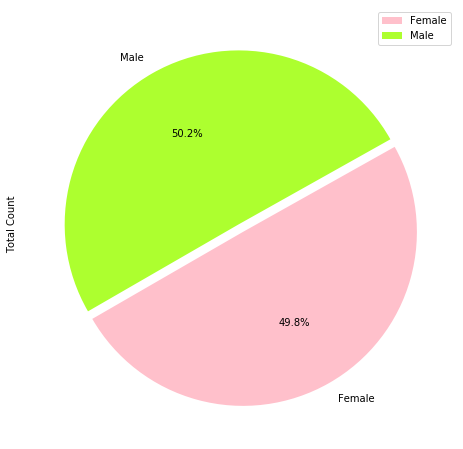

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['pink', 'greenyellow']
explode = (0.05, 0)
plot = gender.plot.pie(y='Total Count',figsize=(8,8),startangle=210, explode=explode, colors = colors,  autopct = "%.1f%%")

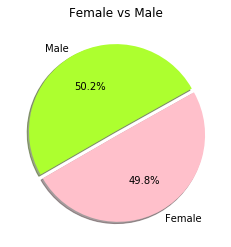

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Define Female and Male size
male = 50.200803
female = 49.799197
#Config for Pie Chart
labels = ["Female", "Male"]
sizes= [female,male]
colors = ['pink', 'greenyellow']
explode = (0.05, 0)

#Create a pie chart
plt.pie(sizes, explode = explode,labels = labels, colors = colors, autopct="%1.1f%%", shadow = True, startangle = 210)

plt.title('Female vs Male')
plt.show()

## Quartiles, outliers and boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Pull the top 4
top_regimes = mergeData[mergeData["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)

top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

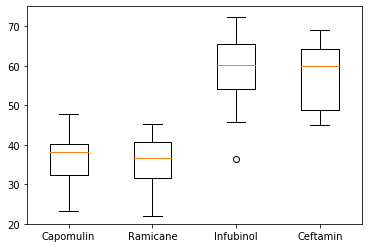

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

top_regimens_sort = top_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_sort.head()

#Turn it into a DF
top_regimens_df = top_regimens_sort.to_frame()
top_regimens_df

#Top 4 list
top4List = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Make the box plot
boxplot_df = top_regimens_df.reset_index()
tumor = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_df = pd.DataFrame(tumor)
tumor_df = tumor_df.reindex(top4List)
tumor_vol = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vol, labels = top4List)
plt.ylim(20 , 75)
plt.show()

## Line and scatter plots

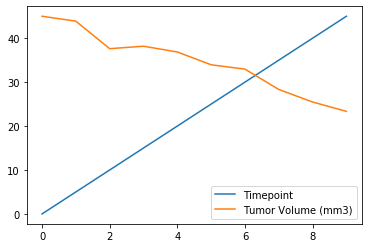

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timeVsTumor = mergeData[mergeData["Mouse ID"].isin(["s185"])]
timeVsTumor

timeVsTumorData = timeVsTumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timeVsTumorData

createLineDF = timeVsTumorData.reset_index()
createLineDF

createLinePlot = createLineDF[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
createLinePlot

showLines = createLinePlot.plot.line()


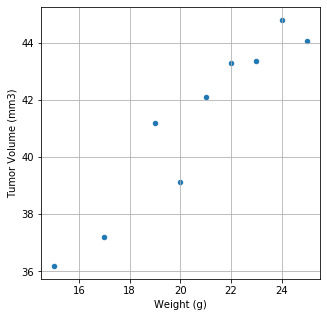

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter = mergeData[mergeData["Drug Regimen"].isin(["Capomulin"])]

scatterDf = top_regimes[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

scatterPlot = scatter.reset_index()

scatterSorted = scatterPlot.sort_values(["Weight (g)"], ascending = True)

byWeight = scatterPlot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

groupedPlot = pd.DataFrame(byWeight).reset_index()

scatter = groupedPlot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize=(5,5))